# Least-Squares Intersection of Lines

Paper: https://silo.tips/download/least-squares-intersection-of-lines (Least-Squares Intersection of Lines, Johannes Traa - UIUC 2013)

Tested the implementation in 2D here. 3D implementation doesn't need extra precaution. Even though sometimes these computations may result with `NaN`, so use mean of all points in this case.

## Find Intersection Point (ML Method)

[[0.74646739]
 [0.09755435]]


(-2.0, 2.0)

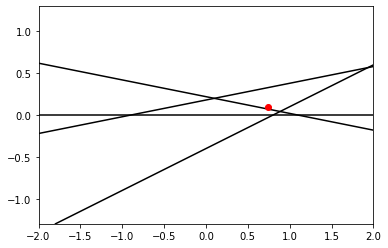

In [5]:
import numpy as np
import matplotlib.pyplot as plt

vec1 = 0.1, 0.2, 0.2
vec2 = 0.1, 0.2, -0.2
vec3 = 1, 0.1, 0.5
vec4 = 0, 0, 0

vecs = [vec1, vec2, vec3, vec4]

R = np.zeros((2,2))
q = np.zeros((1,2))

for v in vecs:
    x,y,s = v
    a = (x,y)
    vx = np.cos(np.arctan(s))
    vy = np.sin(np.arctan(s))
    n = (vx, vy)
    n = np.array(n).reshape(2,1)

    R += np.eye(2) - n @ n.T
    q += (np.eye(2) - n @ n.T) @ a
    plt.axline((x,y), slope=s, color='k')
    
point = np.linalg.pinv(R) @ q.T
print(point)  
plt.plot(point[0], point[1], "or")
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)

[[0.21109695]
 [0.87867407]]


(-2.0, 2.0)

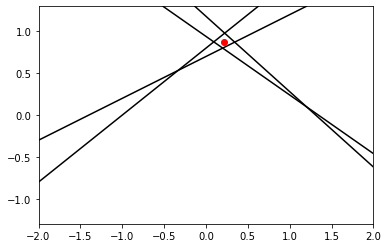

In [6]:
vec1 = -1, 0, 0.8
vec2 = -1.2, 0.1, 0.5
vec3 = 1.2, 0.1, -0.7
vec4 = 1.2, 0.1, -0.9

vecs = [vec1, vec2, vec3, vec4]

R = np.zeros((2,2))
q = np.zeros((1,2))

for v in vecs:
    x,y,s = v
    a = (x,y)
    vx = np.cos(np.arctan(s))
    vy = np.sin(np.arctan(s))
    n = (vx, vy)
    n = np.array(n).reshape(2,1)

    R += np.eye(2) - n @ n.T
    q += (np.eye(2) - n @ n.T) @ a
    plt.axline((x,y), slope=s, color='k')
    
point = np.linalg.pinv(R) @ q.T
print(point)  
plt.plot(point[0], point[1], "or")
plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)

## Find Intersection Point (MAP Method)

This method finds the intersection point but with a bias towards a point. I have used mean of all points for the bias point to handle cases with bell pepper pointclouds with very limited data.

**Note:** I have implemented this directly in C++ in the project.